In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21613, 21)

# Data PreProcessing

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64
date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64
price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    193

In [8]:
df.drop(['id'],axis=1,inplace=True)

In [9]:
for i in df['yr_renovated']:
    if i!=0:
        df['yr_renovated'].replace(i,1,inplace = True)

In [10]:
df['year']=df['date'].str[:4]

In [11]:
df['year'].value_counts()

2014    14633
2015     6980
Name: year, dtype: int64

In [12]:
df['month']=df['date'].str[4:6]

In [13]:
df['date']=df['date'].str[6:8]

In [14]:
df['date']=pd.to_numeric(df['date'])
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])



## Calculate mean, median, std dev, and quartiles of numerical data

In [15]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,15.688197,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,0.042289,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,8.635063,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,0.201253,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,1.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,8.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,16.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,23.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,31.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [16]:
for i in df.columns:
    print(i)
    print(df[i].median())
    print('-------')

date
16.0
-------
price
450000.0
-------
bedrooms
3.0
-------
bathrooms
2.25
-------
sqft_living
1910.0
-------
sqft_lot
7618.0
-------
floors
1.5
-------
waterfront
0.0
-------
view
0.0
-------
condition
3.0
-------
grade
7.0
-------
sqft_above
1560.0
-------
sqft_basement
0.0
-------
yr_built
1975.0
-------
yr_renovated
0.0
-------
zipcode
98065.0
-------
lat
47.5718
-------
long
-122.23
-------
sqft_living15
1840.0
-------
sqft_lot15
7620.0
-------
year
2014.0
-------
month
6.0
-------


In [17]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,9,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1,98125,47.7210,-122.319,1690,7639,2014,12
2,25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,9,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

date


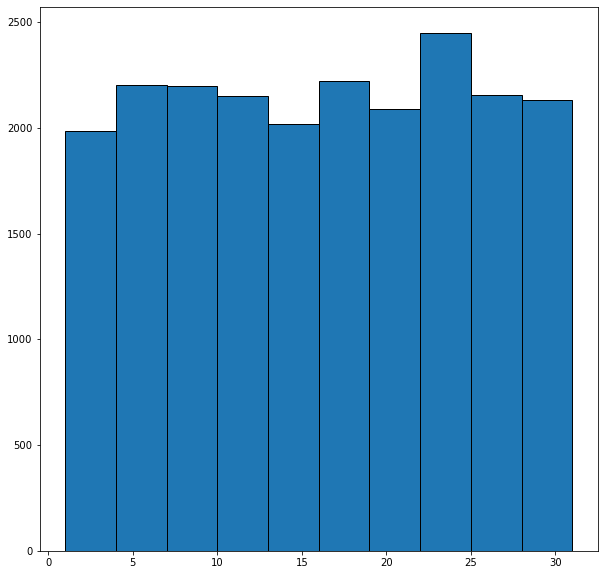

price


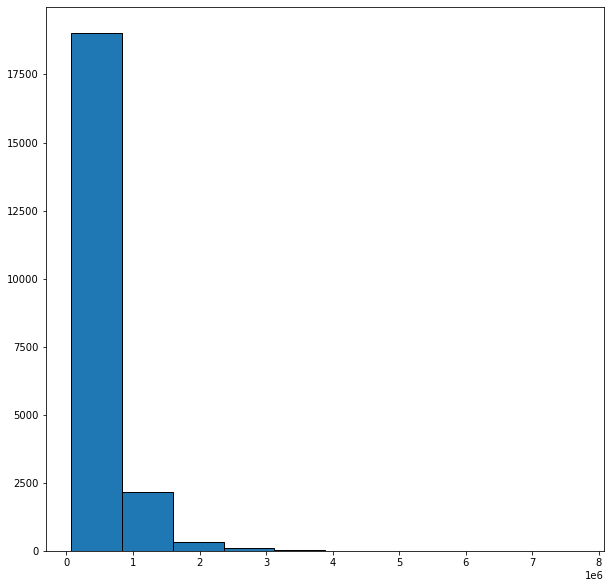

bedrooms


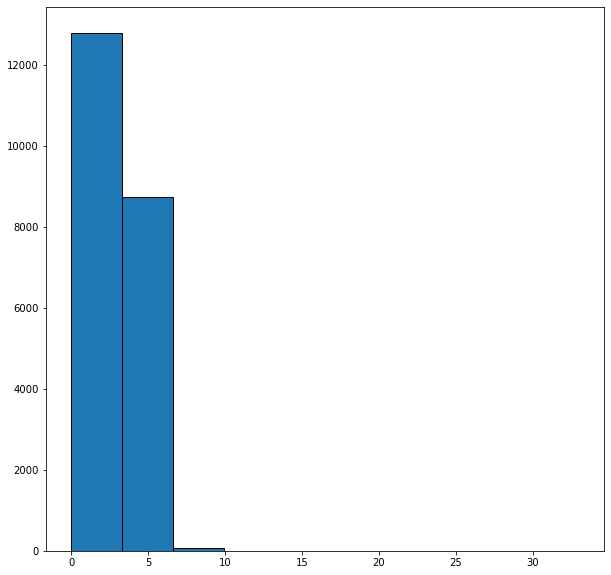

bathrooms


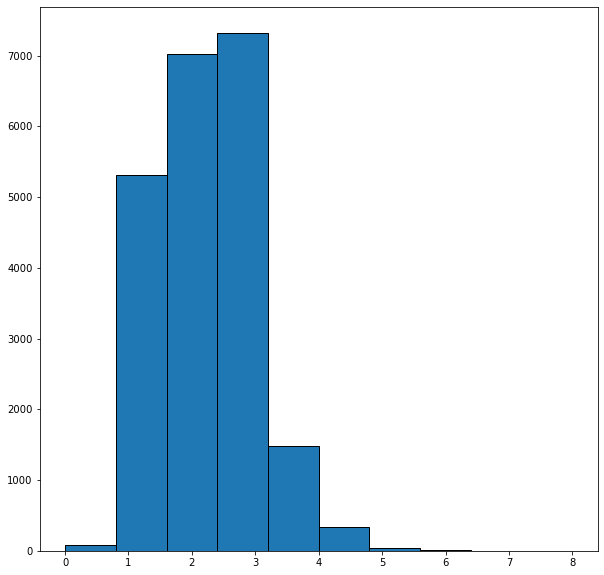

sqft_living


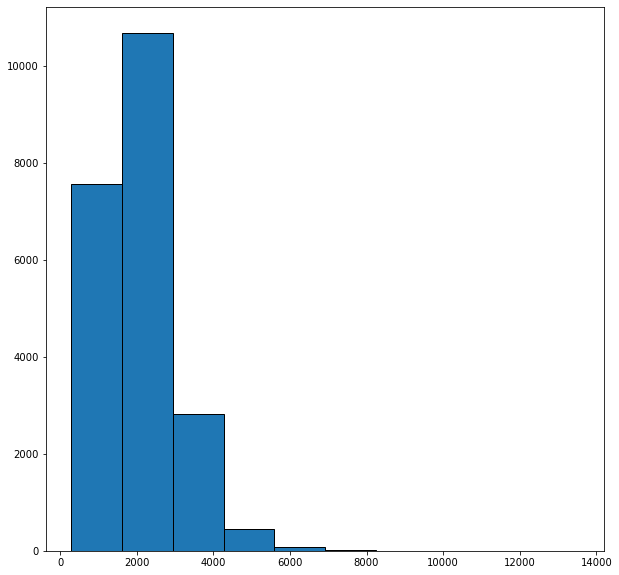

sqft_lot


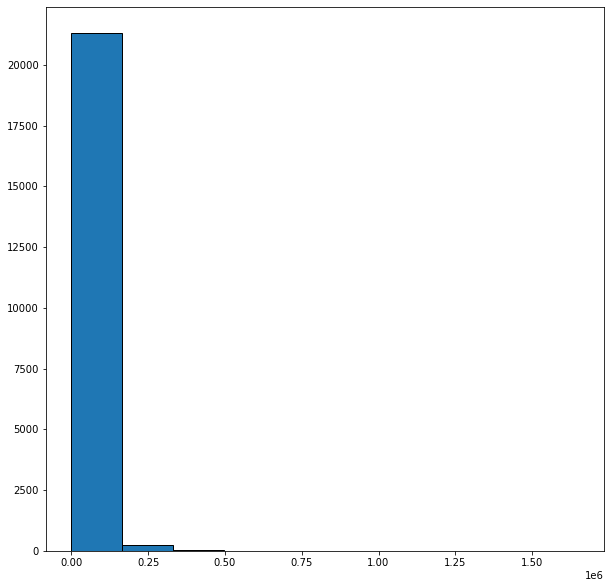

floors


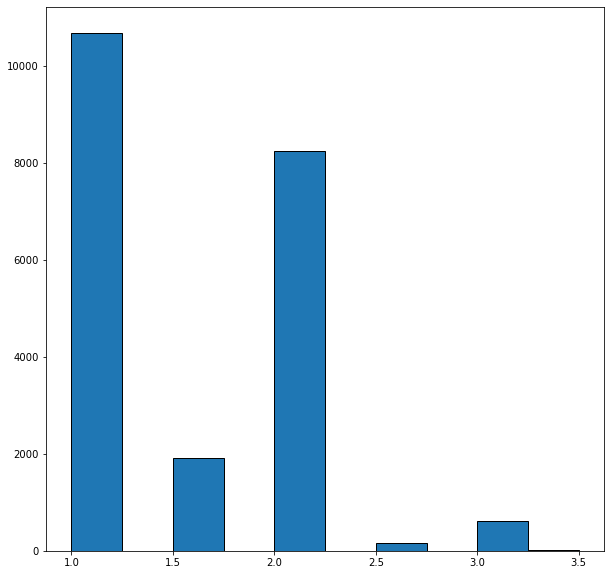

waterfront


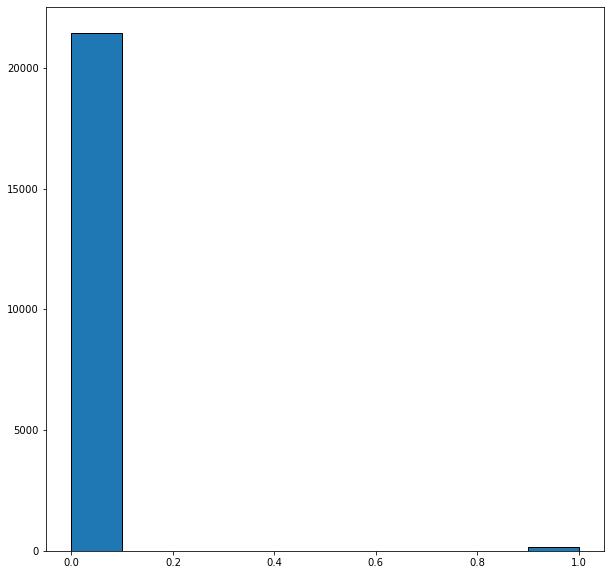

view


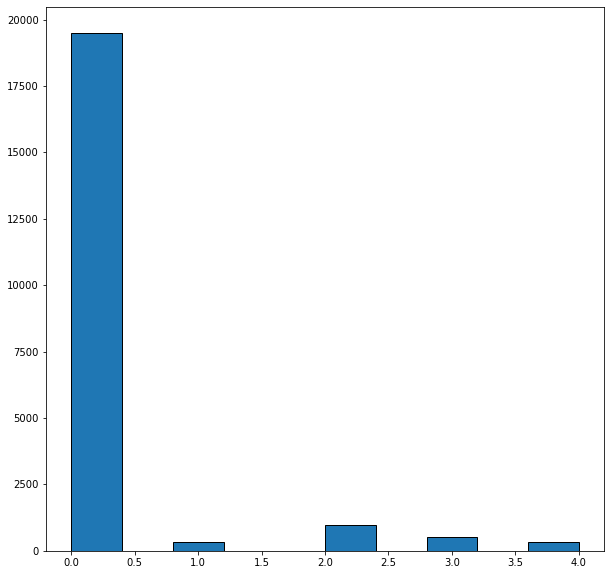

condition


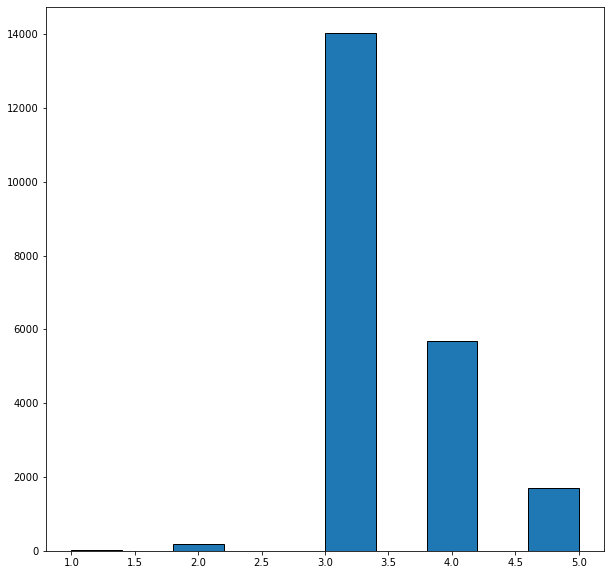

grade


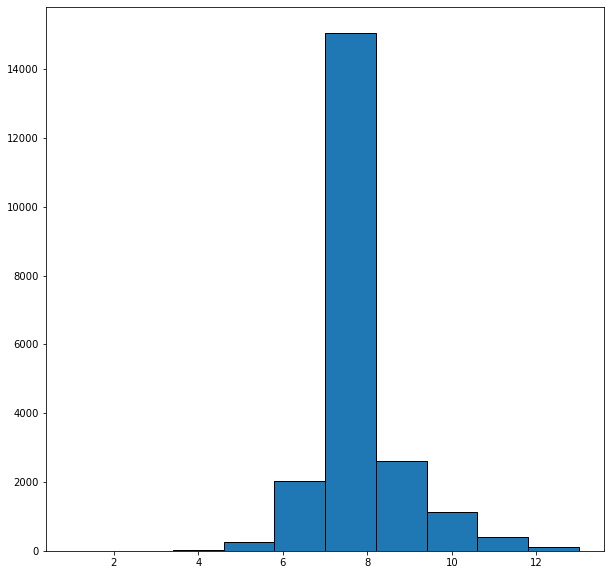

sqft_above


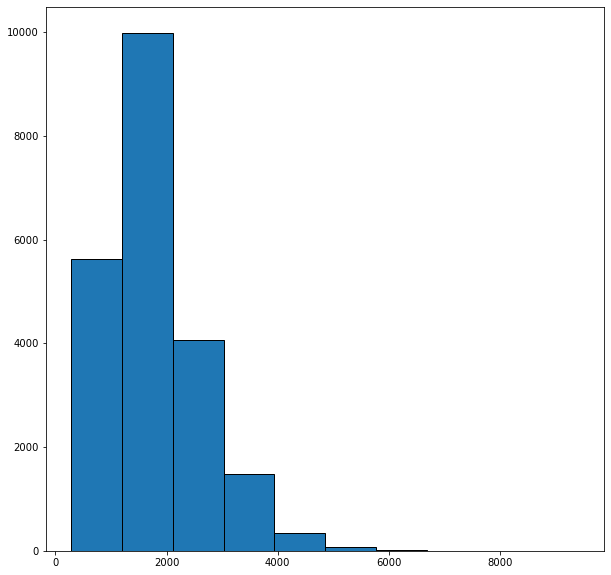

sqft_basement


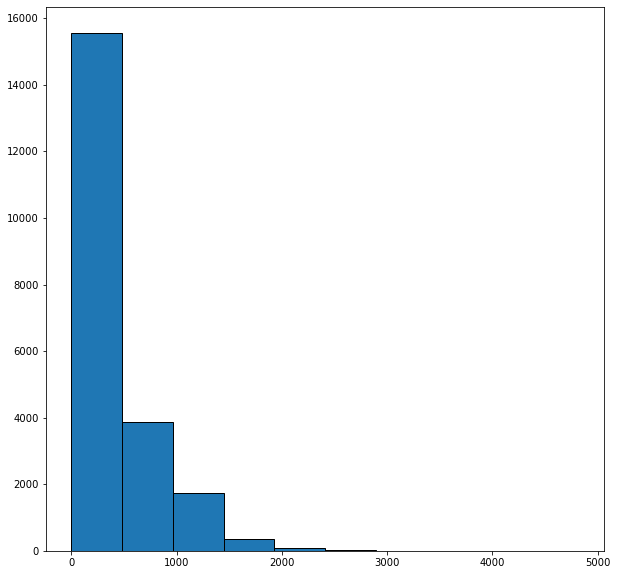

yr_built


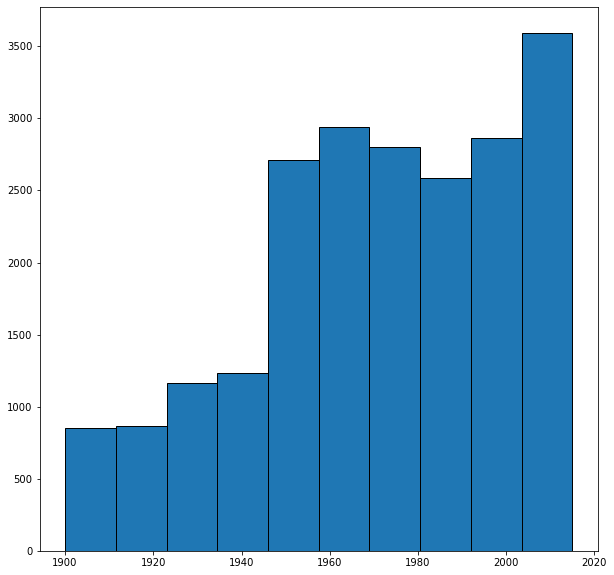

yr_renovated


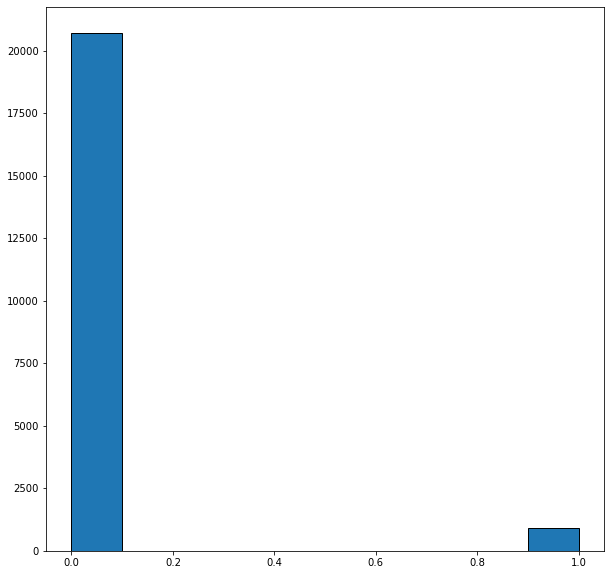

zipcode


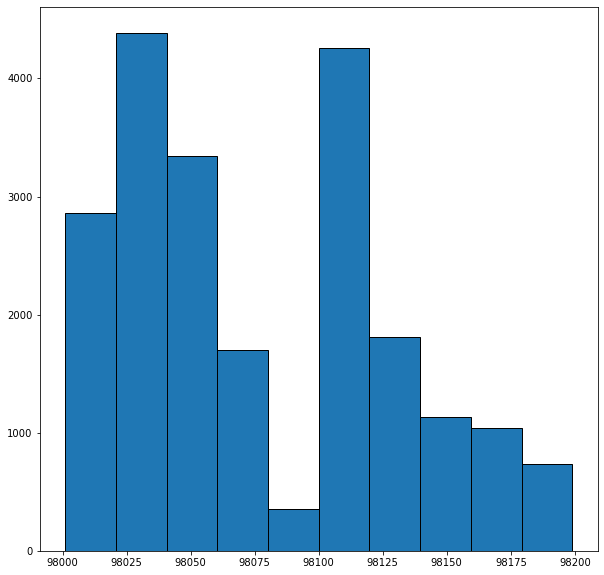

lat


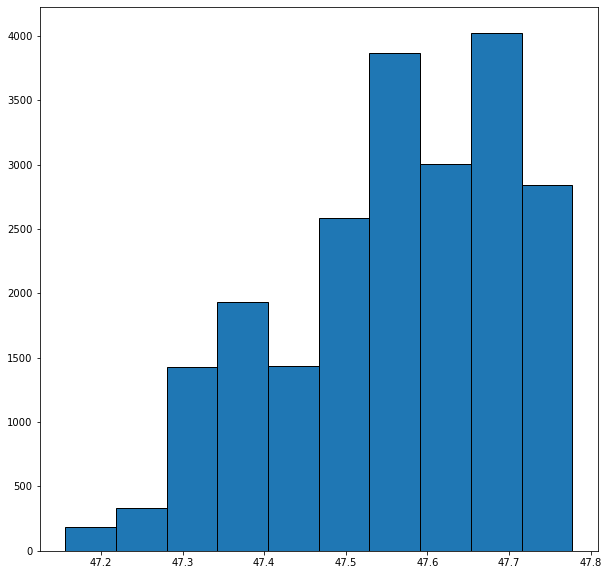

long


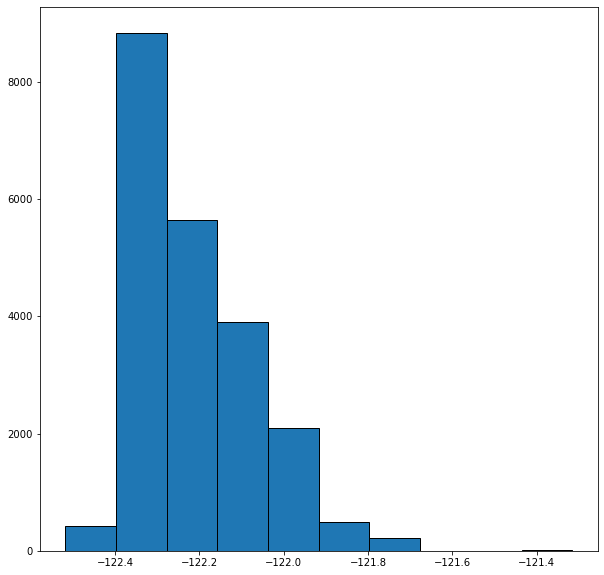

sqft_living15


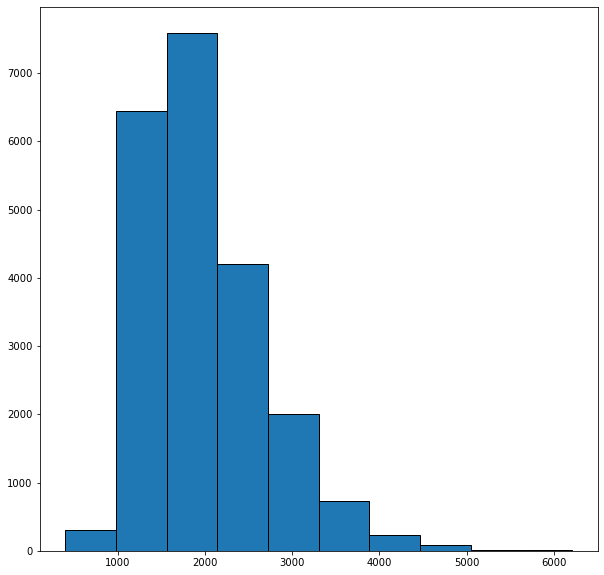

sqft_lot15


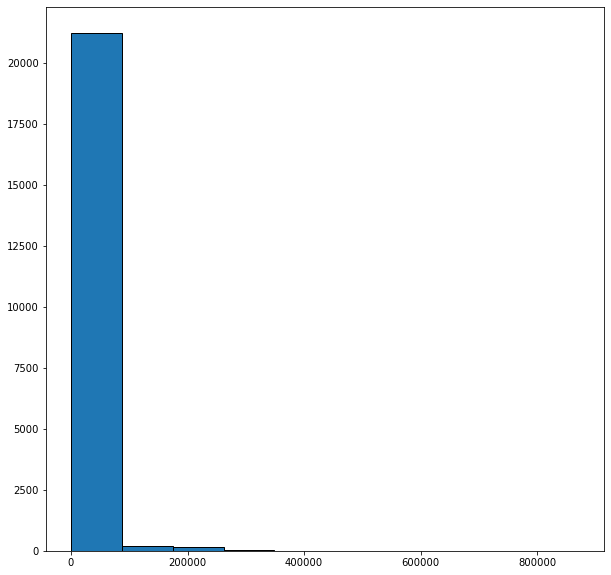

year


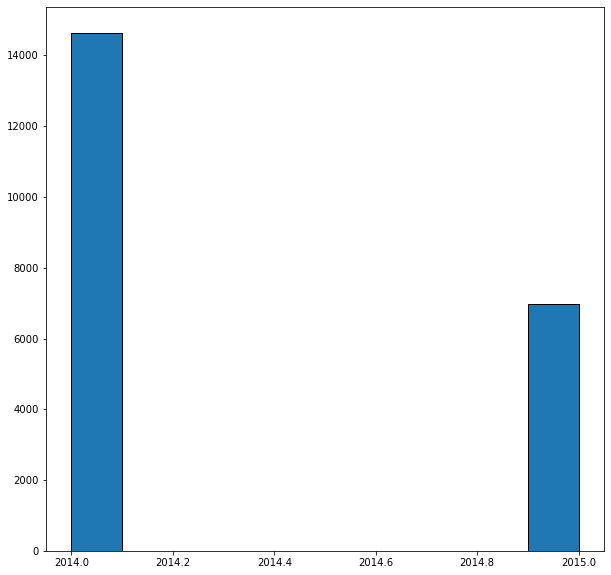

month


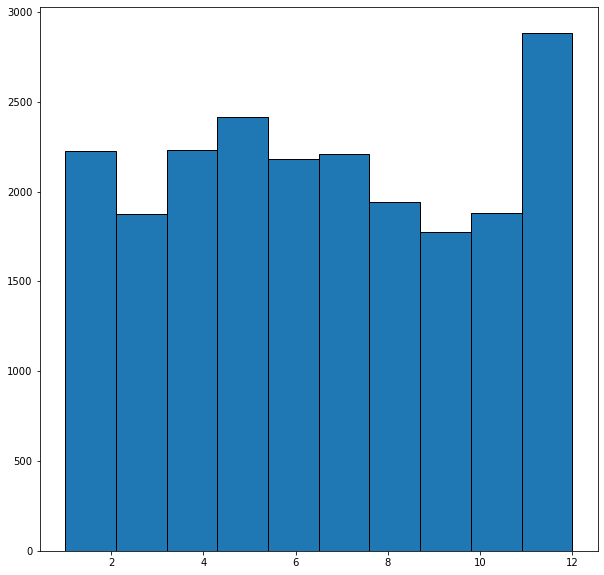

In [19]:
for i in df.columns:
    print(i)
    plt.figure(figsize=(10,10))
    plt.hist(df[i],  edgecolor='black')
    plt.show()

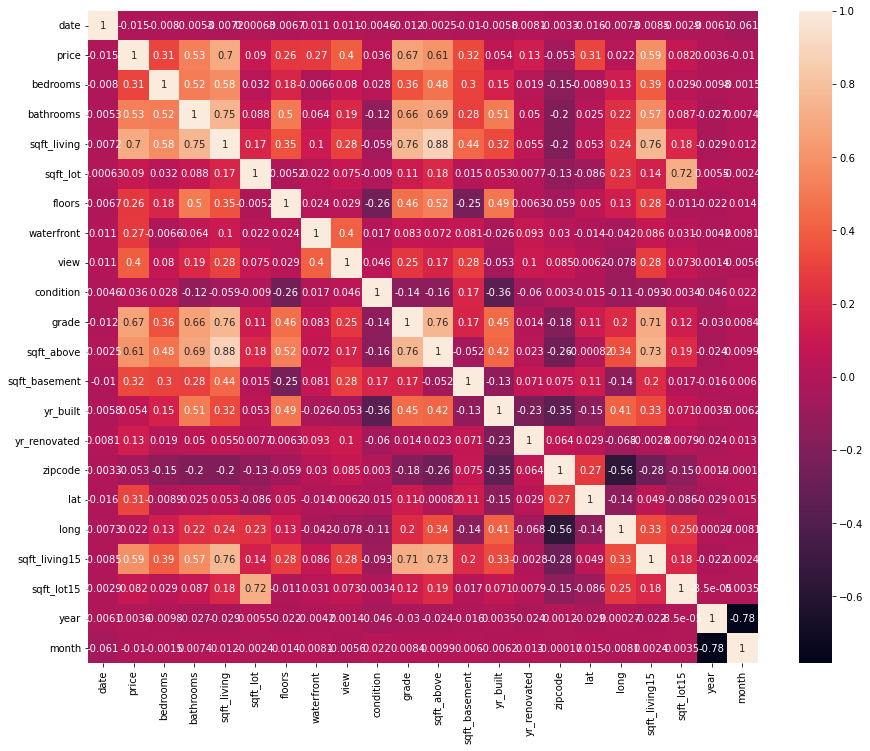

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7032\3140392323.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


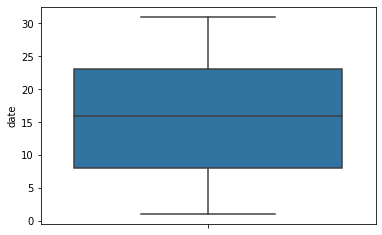

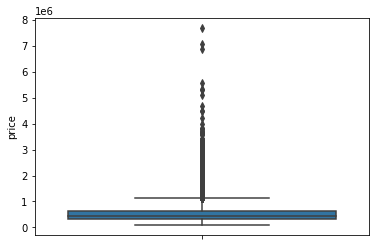

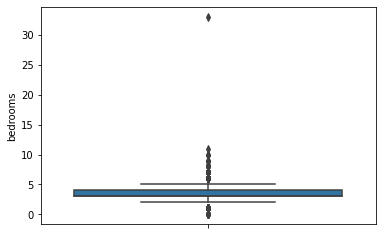

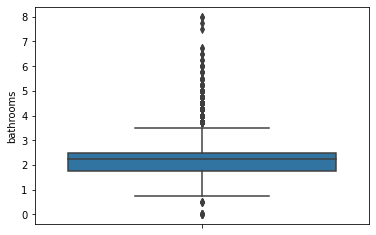

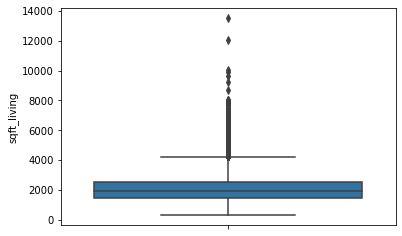

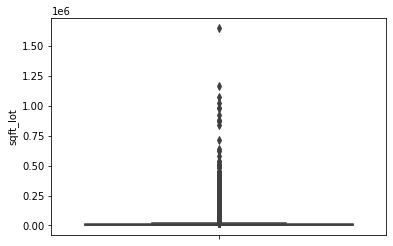

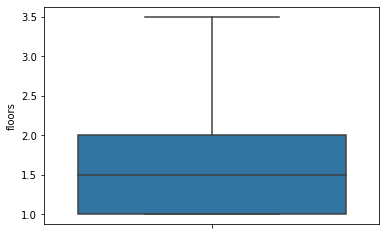

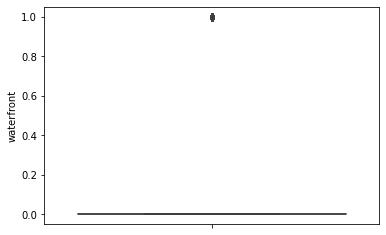

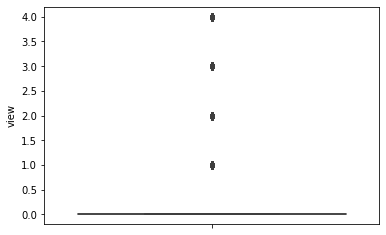

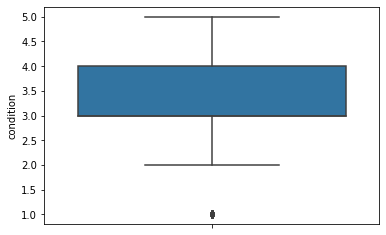

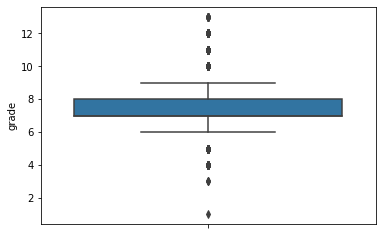

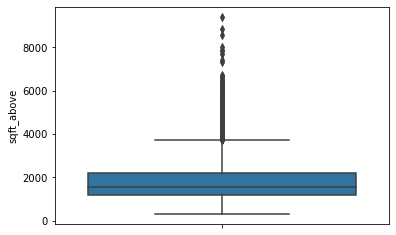

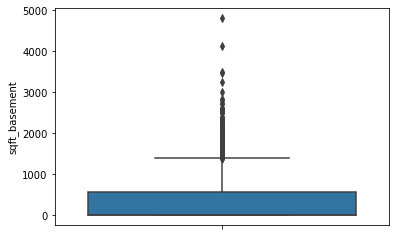

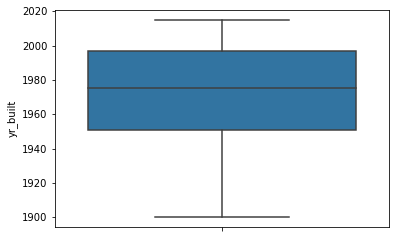

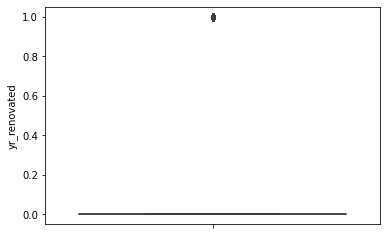

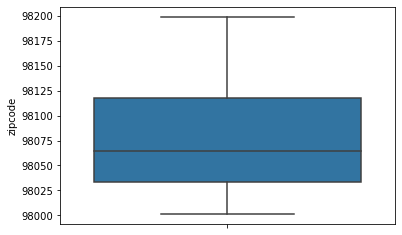

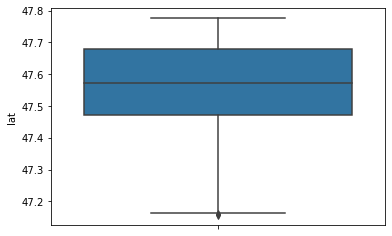

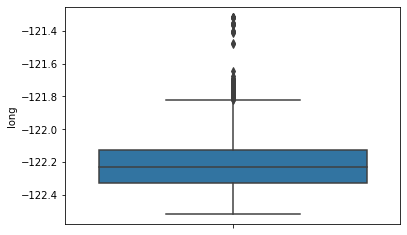

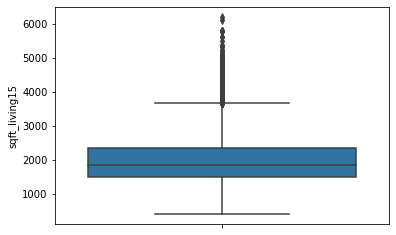

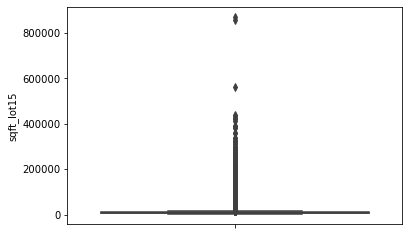

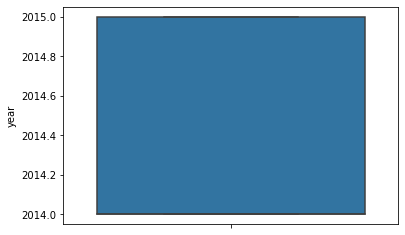

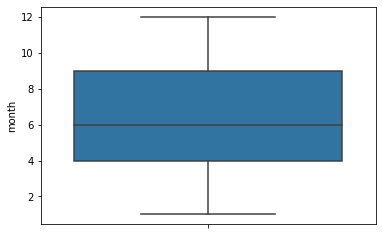

In [21]:
for c in df.columns:
    plt.figure()
    sns.boxplot(y=c, data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


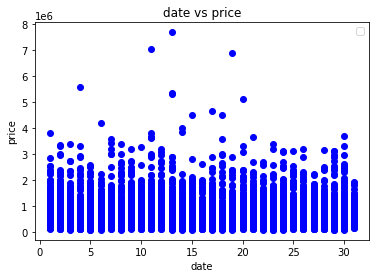

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


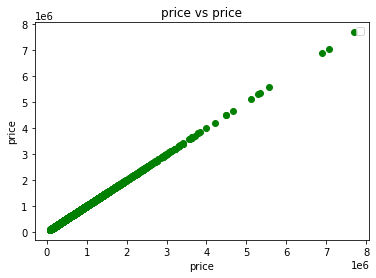

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


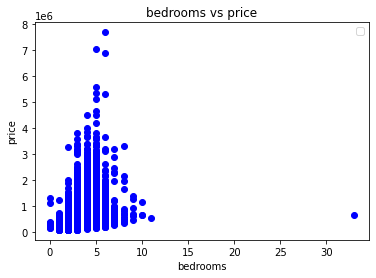

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


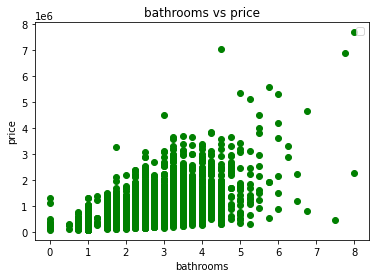

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


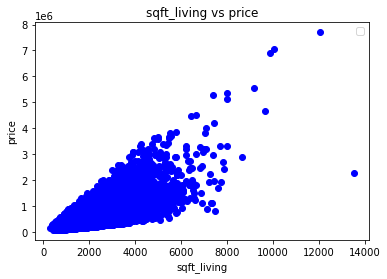

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


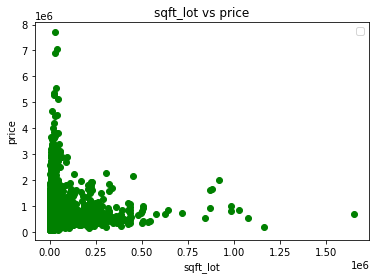

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


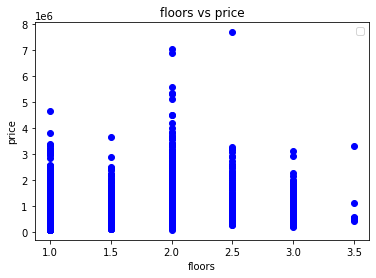

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


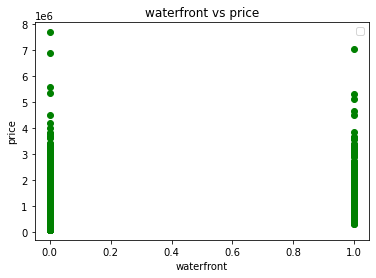

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


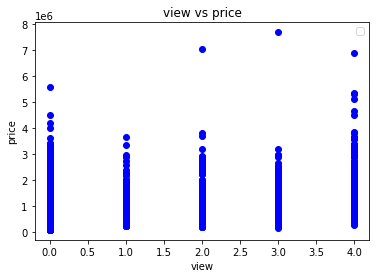

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


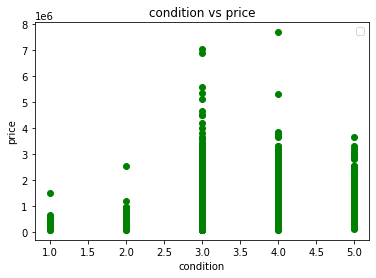

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


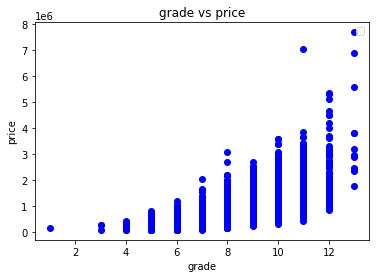

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


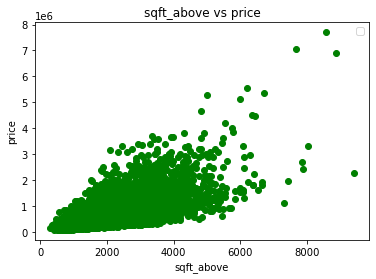

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


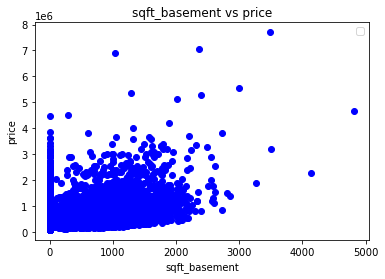

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


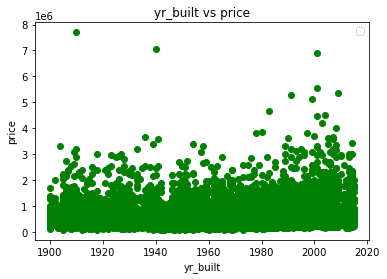

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


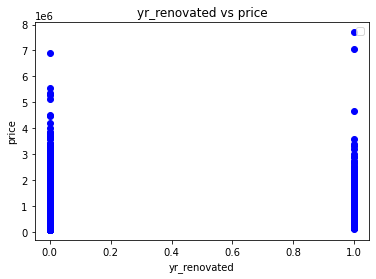

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


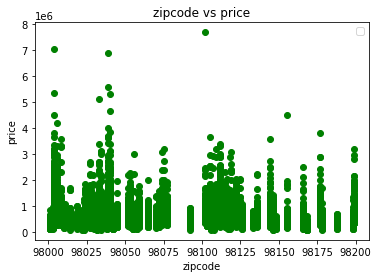

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


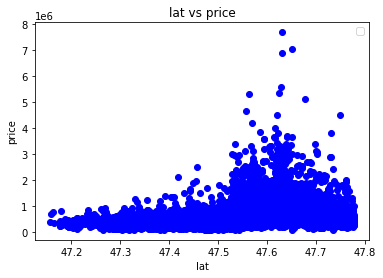

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


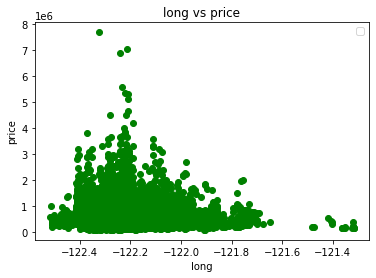

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


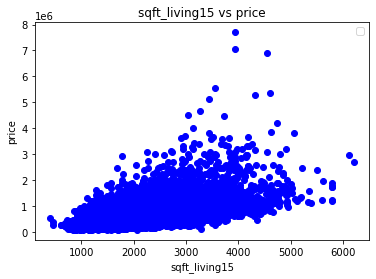

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


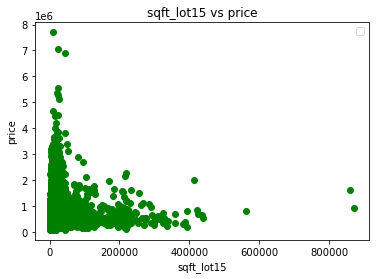

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


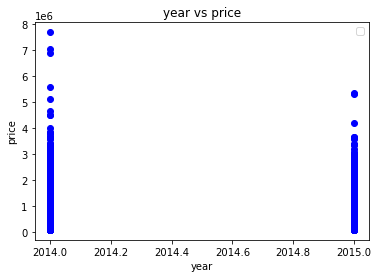

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


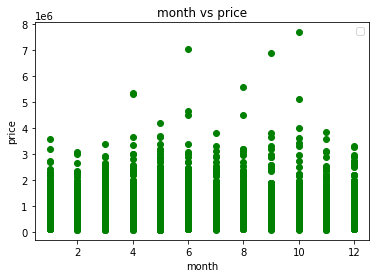

In [22]:
import itertools
y_col='price'
colors=itertools.cycle(['b','g'])
for i in df.columns:
    figure=plt.figure
    ax=plt.gca()
    ax.scatter(df[i],df[y_col],color=next(colors))
    ax.set_xlabel(i)
    ax.set_ylabel(y_col)
    ax.set_title(f'{i} vs {y_col}')
    plt.legend()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7032\1457095992.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


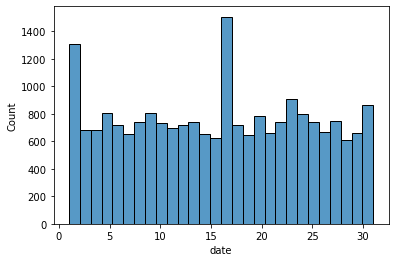

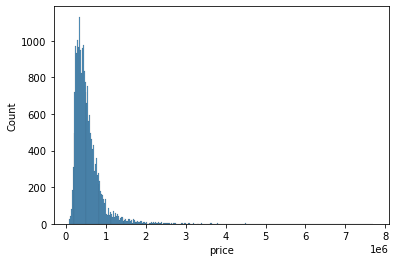

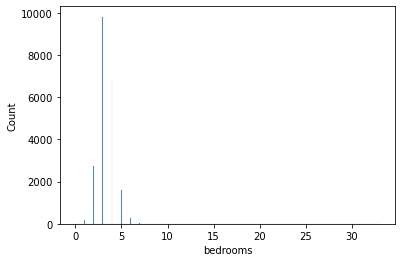

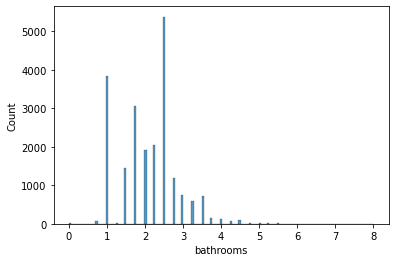

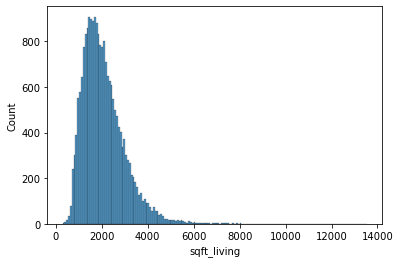

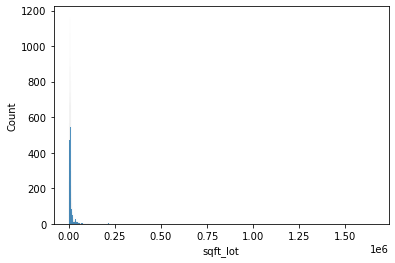

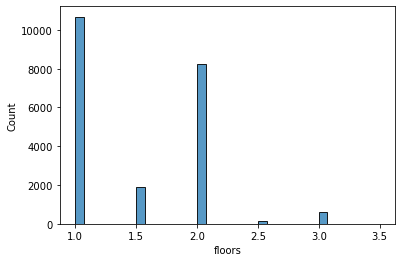

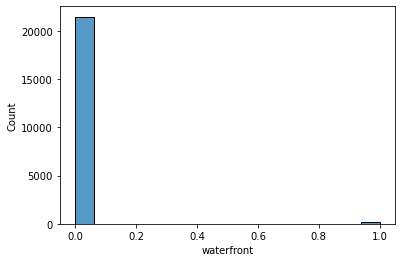

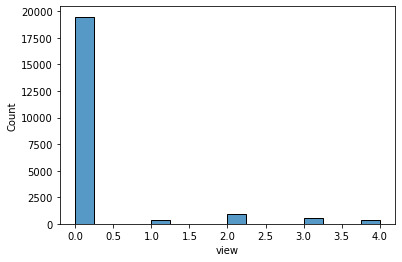

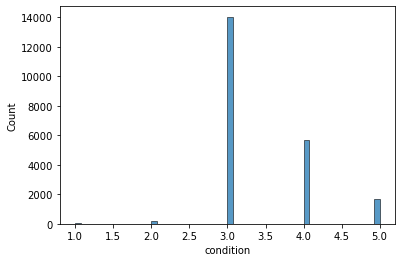

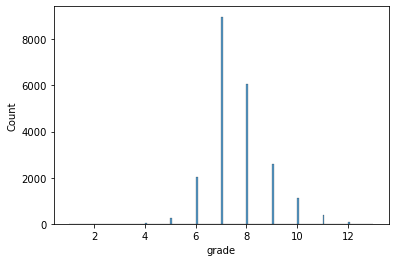

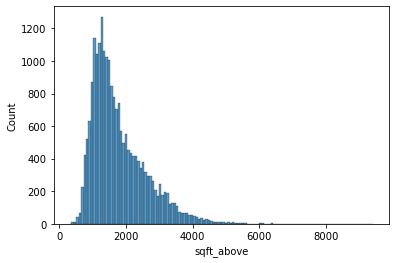

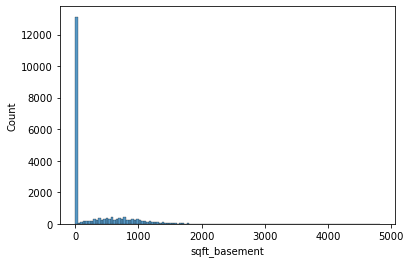

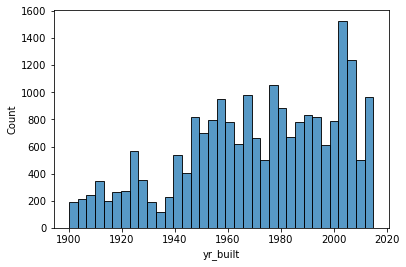

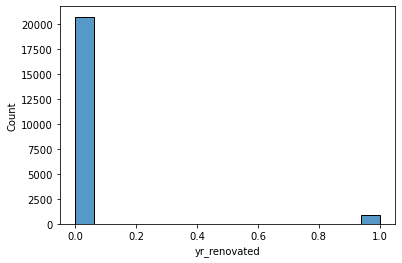

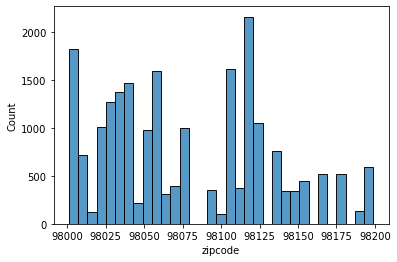

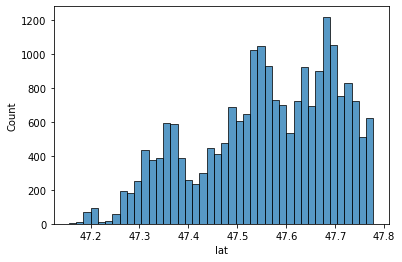

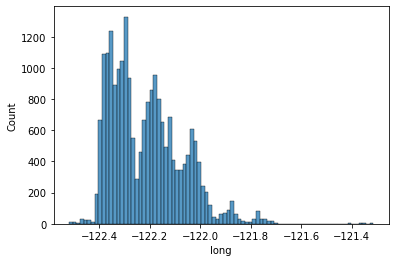

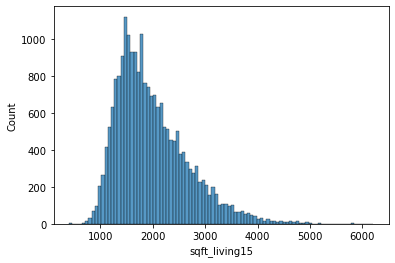

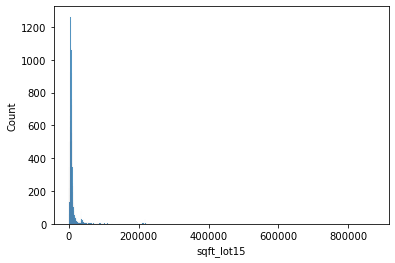

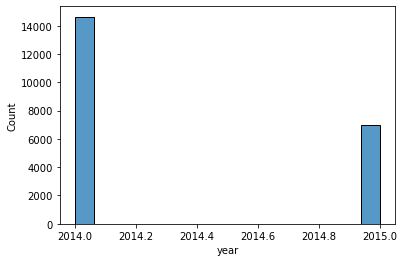

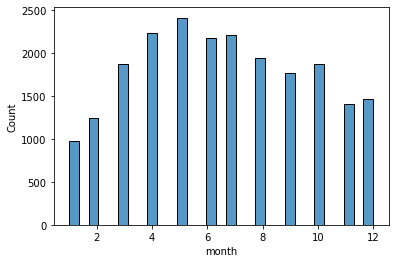

In [23]:
for i in df.columns:
    plt.figure()
    sns.histplot(df[i])

In [24]:
# since sqft_above and sqft_living have very high linearity we have to remove one column from here
# removing sqrt_above from here
df.drop(['sqft_above'],axis=1,inplace=True)


In [25]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,9,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1,98125,47.7210,-122.319,1690,7639,2014,12
2,25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,9,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month'],
      dtype='object')

In [27]:
X=df.drop(['price'],axis=1)

In [28]:
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,13,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,9,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1,98125,47.7210,-122.319,1690,7639,2014,12
2,25,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,9,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,18,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,23,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,23,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,16,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [29]:
Y=df['price']

In [30]:
df.dtypes

date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
dtype: object

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [35]:
reg.fit(X_train, Y_train)

LinearRegression()

In [36]:
Y_pred=reg.predict(X_test)

In [37]:
Y_pred1=reg.predict(X_train)

In [38]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6878909931775703

In [39]:
rsquared=r2_score(Y_train, Y_pred1)
rsquared

0.7063139268572806

# CHI SCORE TEST

In [40]:
from sklearn.feature_selection import chi2


In [41]:
import numpy as np
from scipy.stats import chi2_contingency


In [42]:
Chi_square_statistic,p,dof,expec = chi2_contingency(pd.crosstab(df['waterfront'],df['view']))
print(Chi_square_statistic,p,dof,expec)
# Print the results
# print(f"Chi-square statistic: {chi2:.3f}")
# print(f"p-value: {p:.3f}")
# print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:")
# print(expected)

7572.5563318397735 0.0 4 [[1.93420187e+04 3.29496137e+02 9.55737288e+02 5.06153704e+02
  3.16594179e+02]
 [1.46981308e+02 2.50386342e+00 7.26271226e+00 3.84629621e+00
  2.40582057e+00]]


In [43]:
Chi_square_statistic,p,dof,expec = chi2_contingency(pd.crosstab(df['condition'],df['grade']))
print(Chi_square_statistic,p,dof,expec)
print(p)

2225.6248376517715 0.0 44 [[1.38805349e-03 4.16416046e-03 4.02535511e-02 3.35908944e-01
  2.82885301e+00 1.24661084e+01 8.42270856e+00 3.62975987e+00
  1.57405265e+00 5.53833341e-01 1.24924814e-01 1.80446953e-02]
 [7.95817332e-03 2.38745200e-02 2.30787026e-01 1.92587794e+00
  1.62187572e+01 7.14723546e+01 4.82901957e+01 2.08106232e+01
  9.02456855e+00 3.17531116e+00 7.16235599e-01 1.03456253e-01]
 [6.49192616e-01 1.94757785e+00 1.88265859e+01 1.57104613e+02
  1.32305455e+03 5.83039888e+03 3.93930079e+03 1.69763869e+03
  7.36184426e+02 2.59027854e+02 5.84273354e+01 8.43950400e+00]
 [2.62758525e-01 7.88275575e-01 7.61999722e+00 6.35875630e+01
  5.35501874e+02 2.35983431e+03 1.59441873e+03 6.87113543e+02
  2.97968167e+02 1.04840651e+02 2.36482672e+01 3.41586082e+00]
 [7.87026327e-02 2.36107898e-01 2.28237635e+00 1.90460371e+01
  1.60395965e+02 7.06828344e+02 4.77567575e+02 2.05807384e+02
  8.92487855e+01 3.14023504e+01 7.08323694e+00 1.02313422e+00]]
0.0


In [44]:
df['waterfront'].corr(df['view'])

0.40185735069757184

In [45]:
df['condition'].corr(df['grade'])


-0.14467367120300056

In [46]:
# # Dropping the column having almost similar value
# waterfront
# condition
X=df.drop(['price','waterfront','condition'],axis=1)

In [47]:
# import statsmodels.api as sm

# # add constant to the predictor variables
# X = sm.add_constant(X)

# # fit a linear regression model
# model = sm.OLS(Y, X).fit()

# # calculate VIF for each variable
# vif = pd.DataFrame()
# vif["VIF Factor"] = [1 / (1 - rsquared)]
# vif["features"] = "const"
# for i in range(0, X.shape[1]-1):
#     vif.loc[i+1, "features"] = X.columns[i+1]
#     vif.loc[i+1, "VIF Factor"] = 1 / (1 - sm.OLS(X.iloc[:, i+1], X.iloc[:, range(0, X.shape[1]) != i+1]).fit().rsquared)

# print(vif)


In [48]:
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,13,3,1.00,1180,5650,1.0,0,7,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,9,3,2.25,2570,7242,2.0,0,7,400,1951,1,98125,47.7210,-122.319,1690,7639,2014,12
2,25,2,1.00,770,10000,1.0,0,6,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,9,4,3.00,1960,5000,1.0,0,7,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,18,3,2.00,1680,8080,1.0,0,8,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21,3,2.50,1530,1131,3.0,0,8,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,23,4,2.50,2310,5813,2.0,0,8,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,23,2,0.75,1020,1350,2.0,0,7,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,16,3,2.50,1600,2388,2.0,0,8,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [49]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, Y_train)
Y_pred=reg.predict(X_test)
Y_pred1=reg.predict(X_train)
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6724366791905885

In [51]:
r2_score(Y_train, Y_pred1)

0.6876313916149238

In [52]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()

In [53]:
dr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [54]:
Y_pred=dr.predict(X_test)

In [55]:
Y_pred1=dr.predict(X_train)

In [56]:
r2_score(Y_test, Y_pred)

0.7202435762778787

In [57]:
r2_score(Y_train, Y_pred1)

1.0

# MultiColinearity (VIF)

In [58]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("kc_house_data.csv")

# Remove irrelevant variables and split the data into X and y
X = data.drop(columns=["id", "date", "price"])
y = data["price"]

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [1 / (1 - sm.OLS(y, sm.add_constant(X)).fit().rsquared)]
vif["features"] = "const"
for i in range(X.shape[1]):
    features = list(X.columns)
    features.remove(X.columns[i])
    model = sm.OLS(X.iloc[:, i], sm.add_constant(X.loc[:, features])).fit()
    vif.loc[i+1, "features"] = X.columns[i]
    vif.loc[i+1, "VIF Factor"] = 1 / (1 - model.rsquared)

print(vif)

C:\Users\user\AppData\Local\Temp\ipykernel_7032\968493306.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif.loc[i+1, "VIF Factor"] = 1 / (1 - model.rsquared)
C:\Users\user\AppData\Local\Temp\ipykernel_7032\968493306.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif.loc[i+1, "VIF Factor"] = 1 / (1 - model.rsquared)
C:\Users\user\AppData\Local\Temp\ipykernel_7032\968493306.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif.loc[i+1, "VIF Factor"] = 1 / (1 - model.rsquared)


    VIF Factor       features
0     3.330527          const
1     1.652063       bedrooms
2     3.350793      bathrooms
3          inf    sqft_living
4     2.102522       sqft_lot
5     2.011907         floors
6     1.203766     waterfront
7     1.435160           view
8     1.249475      condition
9     3.417046          grade
10         inf     sqft_above
11         inf  sqft_basement
12    2.430649       yr_built
13    1.150554   yr_renovated
14    1.662174        zipcode
15    1.180630            lat
16    1.825579           long
17    2.979713  sqft_living15
18    2.135668     sqft_lot15


# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()

In [60]:
dc.fit(X_train,Y_train)

DecisionTreeRegressor()

In [61]:
Y_predb1=dc.predict(X_test)
Y_predb2=dc.predict(X_train)

In [62]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_predb1)

0.696616295005992

In [63]:
r2_score(Y_train, Y_predb2)

1.0

# RANDOM FOREST

In [64]:
no_of_decision_trees=[10,20,30,40,50,60,70,80,90,100]
max_no_of_features=["sqrt","log2"]
max_depth_of_decision_tree=[6,7,8,9,10,11,12,13,14,15]

min_sample_split=[1,2,3,4,5]

In [65]:
# random_grid={
#     'n_estimators': no_of_decision_trees,
#     'max_features': max_no_of_features,
#     'max_depth': max_depth_of_decision_tree,
#     'criterion': criterion_for_decision_tress,
#     'min_samples_split': min_sample_split
# }

In [66]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()

In [67]:
from sklearn.model_selection import RandomizedSearchCV


In [68]:


# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop =150, num = 10)],
               'max_features': ['auto', 'sqrt'],
              
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}



In [69]:
# Create a RandomizedSearchCV object
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the RandomizedSearchCV object on the training data
rf.fit(X_train, Y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters from RandomizedSearchCV:")
print(rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters from RandomizedSearchCV:
{'n_estimators': 111, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}


In [70]:
# Create a random forest regressor object with the best hyperparameters found by RandomizedSearchCV
rf = RandomForestRegressor(**rf.best_params_, random_state=42)
rf

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=111,
                      random_state=42)

In [71]:
# Fit the model on the training data
rf.fit(X_train, Y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

In [72]:
r2_score(Y_test, y_pred)

0.8445508679080203

In [73]:
Y_pred1=rf.predict(X_train)

In [74]:
r2_score(Y_train, Y_pred1)

0.9999999943791141

In [75]:
# Calculate R-squared score on the test data
r2_score = rf.score(X_test, Y_test)
r2_score

0.8445508679080203

# Random Forest GridSearchCV

In [76]:
no_of_decision_trees=[10,20,30,40,50,60,70,80,90,100]
max_no_of_features=["sqrt","log2"]
max_depth_of_decision_tree=[6,7,8,9,10,11,12,13,14,15]
criterion_for_decision_tress=["squared_error", "absolute_error", "friedman_mse", "poisson"]
min_sample_split=[1,2,3,4,5]

In [77]:
random_grid={
    'n_estimators':no_of_decision_trees,
    'max_features':max_no_of_features,
    'max_depth':max_depth_of_decision_tree
}

In [78]:
from sklearn.model_selection import GridSearchCV # Creating model of Grid Search CV 
rf_Grid=GridSearchCV(estimator=rf,
                    param_grid=random_grid,cv=5,verbose=2,n_jobs=-1)

In [79]:
rf_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False,
                                             max_features='sqrt',
                                             n_estimators=111,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [80]:
Y_predd1=rf_Grid.predict(X_test)

In [81]:
Y_predd2=rf_Grid.predict(X_train)

In [82]:
from sklearn.metrics import r2_score # checkING r2 score for accuracy on test 
r2_score(Y_test, Y_predd1)

0.8444321262871413

In [83]:
from sklearn.metrics import r2_score # checkING r2 score for accuracy on Train 
r2_score(Y_train, Y_predd2)

0.9881690623011038

# SVR

In [84]:
from sklearn.svm import SVR
SVR

sklearn.svm._classes.SVR

In [85]:
svr= SVR(kernel = 'linear', gamma = 'scale', degree = 90, coef0 = 2, C = 75)
svr.fit(X_train,Y_train)

# Predict the target variable for the test set
y_prede1 = svr.predict(X_test)
y_prede2 = svr.predict(X_train)

In [86]:
from sklearn.metrics import r2_score # checkING r2 score for accuracy on test 
r2_score(Y_test, y_prede1)


0.5728558458536996

In [87]:
from sklearn.metrics import r2_score # checkING r2 score for accuracy on test 
r2_score(Y_train, y_prede2)

0.6093584036193265

In [88]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Train a polynomial regression model with degree 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg2 = LinearRegression()
poly_reg2.fit(X_train_poly, Y_train)


# Predict on the test data
y_pred_poly2 = poly_reg2.predict(X_test_poly)
# Predict on the train data
y_pred1_poly2 = poly_reg2.predict(X_train_poly )

# Calculate R-squared score on the test data
r2_score_poly2 = r2_score(Y_test, y_pred_poly2)
# Calculate R-squared score on the train data
r2_score_poly2_train = r2_score(Y_train, y_pred1_poly2)


# Print the R-squared score
print("R-squared score on test data with degree 2 polynomial regression: {:.2f}".format(r2_score_poly2))
print("R-squared score on train data with degree 2 polynomial regression: {:.2f}".format(r2_score_poly2_train))


R-squared score on test data with degree 2 polynomial regression: 0.81
R-squared score on train data with degree 2 polynomial regression: 0.80


In [89]:
# Train a polynomial regression model with degree 3
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg3 = LinearRegression()
poly_reg3.fit(X_train_poly, Y_train)

# Predict on the test data
y_pred_poly3 = poly_reg3.predict(X_test_poly)
# Predict on the train data
y_pred1_poly3 = poly_reg3.predict(X_train_poly )



# Calculate R-squared score on the test data
r2_score_poly3 = r2_score(Y_test, y_pred_poly3)
# Calculate R-squared score on the train data
r2_score_poly3_train = r2_score(Y_train, y_pred1_poly3)




# Print the R-squared score
print("R-squared score on test data with degree 3 polynomial regression: {:.2f}".format(r2_score_poly3))
print("R-squared score on train data with degree 3 polynomial regression: {:.2f}".format(r2_score_poly3_train))


R-squared score on test data with degree 3 polynomial regression: 0.77
R-squared score on train data with degree 3 polynomial regression: 0.89


In [104]:
comparision = pd.read_csv('ML Project Data.csv')

In [105]:
comparision

,Algorithm,r2 score Train,r2 score Test
0,LinearRegression,0.706314,0.687891
1,DecisionTreeRegressor,1.000000,0.723270
2,RandomForestRegressor (RCV),0.972050,0.867032
3,RandomForestRegressor (GCV),0.966938,0.859359
4,SVR,0.609358,0.572856
5,Polynomial Regression(2),0.800000,0.810000
6,Polynomial Regression(3),0.890000,0.770000


# Connecting With Google Sheet

In [91]:
# https://docs.google.com/spreadsheets/d/14ItKUUHeRAGGWlhj8Si1T91L6O0YMokpZjU6VtNhgLU/edit#gid=0
sheet_id='14ItKUUHeRAGGWlhj8Si1T91L6O0YMokpZjU6VtNhgLU'
xls=pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
Price_Prediction=pd.read_excel(xls,'Price_Prediction')

In [92]:
Price_Prediction['Value']

0        13.0000
1         3.0000
2         1.0000
3      1180.0000
4      5650.0000
5         1.0000
6         0.0000
7         7.0000
8         0.0000
9      1955.0000
10        0.0000
11    98178.0000
12       47.5112
13     -122.2570
14     1340.0000
15     5650.0000
16     2014.0000
17       10.0000
Name: Value, dtype: float64

In [99]:
l=[]

for i in Price_Prediction['Value']:
    l.append(i)
l
l=pd.DataFrame(l)
l=l.transpose()


# Making Pickle File

In [96]:
import pickle as pk
filename = "trained_model.sav"
pk.dump(rf, open(filename, "wb"))

In [97]:
loaded_model = pk.load(open("trained_model.sav", "rb"))

# Defining Function For taking Input

In [98]:
def hpp(input_data):
    # input_data = (4.98, 2.31, 0.538, 15.3, 6.575, 296, 4.09, 65)
    arr = np.asarray(input_data)
    arr = arr.reshape(1, -1)
    ar = sc.fit_transform(arr)

    prediction = loaded_model.predict(ar)
    
    return(f"The Predicted Price for House is: {round(prediction[0],2)}")

hpp([[3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650]])

'The Predicted Price for House is: 636170.38'

In [103]:
hpp([[l]])

'The Predicted Price for House is: 636170.38'

In [ ]:
# random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop =150, num = 10)],
#                'max_features': ['auto', 'sqrt'],
              
#                'min_samples_split': [2, 5, 10],
#                'min_samples_leaf': [1, 2, 4],
#                'bootstrap': [True, False]}
# # Define the hyperparameter grid for GridSearchCV
# param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
#               'max_features': ['auto', 'sqrt'],
#               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'bootstrap': [True, False]}
# Create a RandomizedSearchCV object
# rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# # Fit the GridSearchCV object on the training data
# rf_grid.fit(X_train, Y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters from GridSearchCV:")
# print(rf_grid.best_params_)


In [ ]:

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# #  Fit the RandomizedSearchCV object on the training data
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # print("Best parameters from RandomizedSearchCV:")
# # print(rf_rbest_params_)
# # Fit the model on the training data

# rf_random_best.fit(X_train, Y_train)

# # Predict on the test data
# y_pred = rf_random_best.predict(X_test)
# Y_pred1=rf_random_best.predict(X_train)
# from sklearn.metrics import r2_score
# r2_score(Y_train, Y_pred1)
# r2_score(Y_test, y_pred)
# rf_random_best.score(X_test, Y_test)
# from sklearn.metrics import r2_score
# r2_score(Y_test, y_pred)

In [ ]:
# import pandas as pd
# import statsmodels.api as sm

# # Load the dataset
# data = pd.read_csv("kc_house_data.csv")

# # Remove irrelevant variables and split the data into X and y
# X = data.drop(columns=["id", "date", "price"])
# y = data["price"]

# # Calculate VIF for each variable
# vif = pd.DataFrame()
# vif["VIF Factor"] = [1 / (1 - sm.OLS(y, sm.add_constant(X)).fit().rsquared)]
# vif["features"] = "const"
# for i in range(X.shape[1]):
#     features = list(X.columns)
#     features.remove(X.columns[i])
#     model = sm.OLS(X.iloc[:, i], sm.add_constant(X.loc[:, features])).fit()
#     vif.loc[i+1, "features"] = X.columns[i]
#     vif.loc[i+1, "VIF Factor"] = 1 / (1 - model.rsquared)

# print(vif)


In [ ]:
# import numpy as np

# # Create correlation matrix
# corr_matrix = df.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# # Drop features 
# # df.drop(to_drop, axis=1, inplace=True)

In [ ]:
# def correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset

#     print(dataset)

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# # Train a polynomial regression model with degree 2
# poly_features = PolynomialFeatures(degree=2)
# X_train_poly = poly_features.fit_transform(X_train)
# X_test_poly = poly_features.transform(X_test)

# poly_reg2 = LinearRegression()
# poly_reg2.fit(X_train_poly, Y_train)


# # Predict on the test data
# y_pred_poly2 = poly_reg2.predict(X_test_poly)

# # Calculate R-squared score on the test data
# r2_score_poly2 = r2_score(Y_test, y_pred_poly2)

# # Print the R-squared score
# print("R-squared score on test data with degree 2 polynomial regression: {:.2f}".format(r2_score_poly2))

# # Train a polynomial regression model with degree 3
# poly_features = PolynomialFeatures(degree=3)
# X_train_poly = poly_features.fit_transform(X_train)
# X_test_poly = poly_features.transform(X_test)

# poly_reg3 = LinearRegression()
# poly_reg3.fit(X_train_poly, Y_train)

# # Predict on the test data
# y_pred_poly3 = poly_reg3.predict(X_test_poly)

# # Calculate R-squared score on the test data
# r2_score_poly3 = r2_score(Y_test, y_pred_poly3)

# # Print the R-squared score
# print("R-squared score on test data with degree 3 polynomial regression: {:.2f}".format(r2_score_poly3))


In [ ]:
# from sklearn.svm import SVR

# from sklearn.model_selection import RandomizedSearchCV
# para = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
# # svr= SVR(kernel = 'linear', gamma = 'scale', degree = 8, coef0 = 0.5, C = 10)
# # svr.fit(X_train,Y_train)
# # ypred = svr.predict(X_test)
# rsv = RandomizedSearchCV(svr,para,scoring = "neg_mean_squared_error",n_iter = 5, cv = 5,n_jobs = -1)
# rsv.fit(X_train,Y_train)